In [ ]:
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


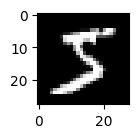

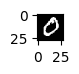

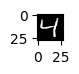

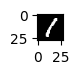

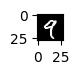

In [ ]:
plt.figure(figsize = (14,14))
x, y = 10, 4
for i in range(5):
  plt.subplot(x, y, i+1)
  plt.imshow(X_train[i])
  plt.show()

In [ ]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 12

img_rows, img_cls = 28, 28


if K.image_data_format() == 'channels_first':

  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cls, 1)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cls, 1)
  input_shape = (img_rows, img_cls, 1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size = (3,3),
                 activation='relu',
                 input_shape = (28, 28, 1)))

model.add(Conv2D(64, (3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.50))

model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

In [ ]:
model.compile(loss = categorical_crossentropy,
              optimizer = Adadelta(),
              metrics = 'accuracy')

In [ ]:
model.fit(X_train, y_train,
          batch_size = BATCH_SIZE,
          epochs = EPOCHS,
          verbose = 1,
          validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 146s 309ms/step - loss: 19.9267 - accuracy: 0.1641 - val_loss: 3.2928 - val_accuracy: 0.4697
Epoch 2/12
469/469 [==============================] - 149s 318ms/step - loss: 8.8758 - accuracy: 0.2781 - val_loss: 1.5676 - val_accuracy: 0.5897
Epoch 3/12
469/469 [==============================] - 151s 321ms/step - loss: 4.8674 - accuracy: 0.3432 - val_loss: 1.1758 - val_accuracy: 0.6123
Epoch 4/12
469/469 [==============================] - 147s 313ms/step - loss: 3.1285 - accuracy: 0.3680 - val_loss: 1.2819 - val_accuracy: 0.5879
Epoch 5/12
469/469 [==============================] - 142s 301ms/step - loss: 2.3877 - accuracy: 0.3745 - val_loss: 1.4110 - val_accuracy: 0.5767
Epoch 6/12
469/469 [==============================] - 144s 308ms/step - loss: 2.0715 - accuracy: 0.3884 - val_loss: 1.4401 - val_accuracy: 0.5876
Epoch 7/12
469/469 [==============================] - 145s 309ms/step - loss: 1.9262 - accuracy: 0.4067 - val_loss: 1.4017 

In [ ]:
model.save('save_models/mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[0])

Test Loss: 1.0126521587371826
Test Accuracy: 1.0126521587371826


In [ ]:
test_image = X_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

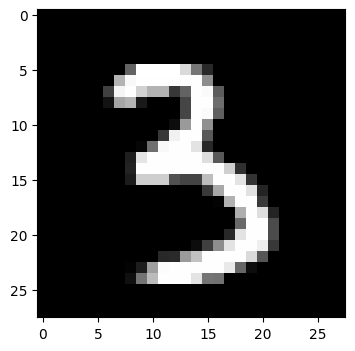

In [ ]:
plt.imshow(test_image.reshape(28, 28))